# Laboratorio de programación Regresión Lineal Multiple

In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

Montar el Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Leer el Dataset desde Google Drive:

In [ ]:
import pandas as pd

# Ruta del archivo en Google Drive
file_path = "/content/drive/MyDrive/IA/Datasets/Life Expectancy Data.csv"

# Cargar el dataset en un DataFrame
df = pd.read_csv(file_path)

# Mostrar las primeras filas
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Verificar las columnas y valores nulos

In [ ]:
import pandas as pd

# Ver información del dataset
print(df.info())

# Contar valores nulos en cada columna
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Eliminar columnas irrelevantes

In [ ]:
# Eliminar columnas irrelevantes
df = df.drop(columns=["Country", "Status", "Year"])


# Manejo de valores nulos

In [ ]:
# Rellenar valores nulos con la media de cada columna
df = df.fillna(df.mean())

# Verificar que no haya valores nulos
print(df.isnull().sum())

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


# Limpiar los nombres de las columnas

In [ ]:
# Eliminar espacios en los nombres de las columnas
df.columns = df.columns.str.strip()
print(df.columns)


Index(['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


# Análisis de correlación

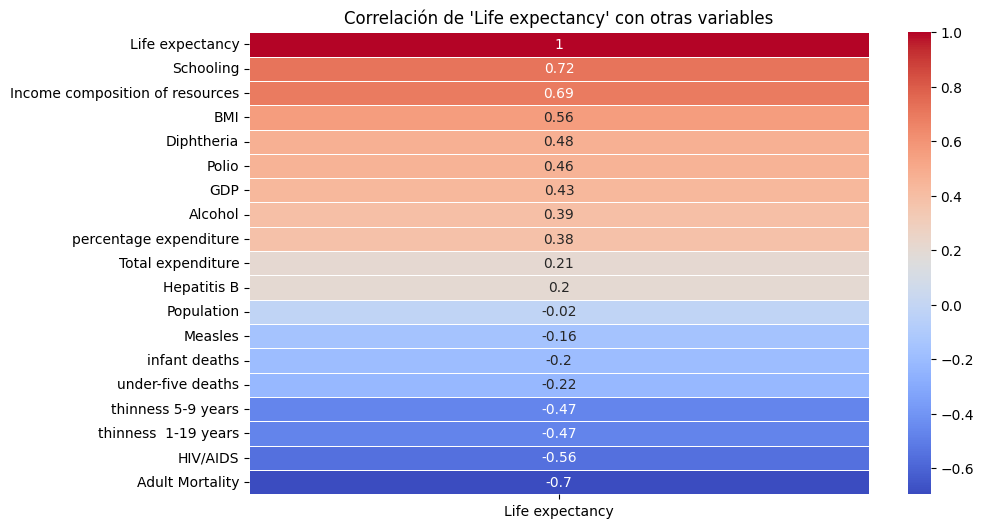

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la correlación de 'Life expectancy' con las demás variables
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[["Life expectancy"]].sort_values(by="Life expectancy", ascending=False),
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlación de 'Life expectancy' con otras variables")
plt.show()

# Selección de variables predictoras

In [ ]:
# Seleccionar variables predictoras (ajusta la lista según la correlación observada)
# ["Adult Mortality", "infant deaths", "Total expenditure", "GDP", "Schooling", "Income composition of resources"]
# ["Mortalidad de adultos", "Muertes infantiles", "Gasto total", "PIB", "Educación", "Composición del ingreso de los recursos"]
selected_features = ["Adult Mortality", "infant deaths", "Total expenditure",
                     "GDP", "Schooling", "Income composition of resources"]

# Definir X (variables predictoras) e y (variable objetivo)
X = df[selected_features]
y = df["Life expectancy"]

# Verificar la estructura de los datos seleccionados
print(X.head())
print("----------------------------------------------------------------")
print(y.head())


   Adult Mortality  infant deaths  Total expenditure         GDP  Schooling  \
0            263.0             62               8.16  584.259210       10.1   
1            271.0             64               8.18  612.696514       10.0   
2            268.0             66               8.13  631.744976        9.9   
3            272.0             69               8.52  669.959000        9.8   
4            275.0             71               7.87   63.537231        9.5   

   Income composition of resources  
0                            0.479  
1                            0.476  
2                            0.470  
3                            0.463  
4                            0.454  
----------------------------------------------------------------
0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64


# Normalización de caracteristicas

$$ Xnorm = \frac{X-μ}{σ}$$

X → Es el valor original de la variable.

𝜇 → Es la media (promedio) de la variable.

𝜎 → Es la desviación estándar, que mide cuánto varían los datos.

In [ ]:
import numpy as np

def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0) #calculamos la media de cada columna
    sigma = np.std(X, axis=0) #calculamos la desviacion estandar
    X_norm = (X - mu) / sigma #aplicamos la formula de normalizacion
    return X_norm, mu, sigma #datos normalizados, media y desviacion estandar

# Aplicar normalización a las variables predictoras
X_norm, mu, sigma = featureNormalize(X)

# Convertir X_norm a un DataFrame para visualizar los datos normalizados
X_norm_df = pd.DataFrame(X_norm, columns=X.columns) #se convierte en dataframe para visualizar los datos y trabajar mas fasil

# Mostrar los primeros valores después de la normalización
print("Media calculada:", mu)
print("Desviación estándar calculada:", sigma)
print(X_norm_df.head())


Media calculada: Adult Mortality                     164.796448
infant deaths                        30.303948
Total expenditure                     5.938190
GDP                                7483.158469
Schooling                            11.992793
Income composition of resources       0.627551
dtype: float64
Desviación estándar calculada: Adult Mortality                      124.059183
infant deaths                        117.906430
Total expenditure                      2.399865
GDP                                13134.564556
Schooling                              3.263826
Income composition of resources        0.204785
dtype: float64
   Adult Mortality  infant deaths  Total expenditure       GDP  Schooling  \
0         0.791586       0.268824           0.925806 -0.525248  -0.579931   
1         0.856072       0.285786           0.934140 -0.523083  -0.610570   
2         0.831890       0.302749           0.913306 -0.521632  -0.641209   
3         0.864132       0.328193           

# Agregar el término de intersección:



- En las ecuaciones, está siempre presente.
- Pero en los datos, NO existe una columna para Xo

- Para incluirlo, agregamos una columna de unos en 𝑋, de manera que 𝑋o =1 para todos los ejemplos.

In [ ]:
# Agregar columna de unos a X_norm para el término de intersección
m = X_norm.shape[0]  # Número de ejemplos (filas) en X_norm
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1) #Agregamos una columna de unos al inicio de X

# Mostrar los primeros valores de X con el término de intersección
print(X[:5, :])

[[ 1.          0.79158632  0.26882378  0.92580631 -0.52524766 -0.57993072
  -0.72540055]
 [ 1.          0.85607167  0.28578638  0.93414012 -0.52308258 -0.61056961
  -0.74005007]
 [ 1.          0.83188966  0.30274898  0.91330561 -0.52163233 -0.6412085
  -0.7693491 ]
 [ 1.          0.86413234  0.32819289  1.07581473 -0.5187229  -0.6718474
  -0.80353132]
 [ 1.          0.88831434  0.34515549  0.8049662  -0.56489282 -0.76376407
  -0.84747987]]


# Descenso por el gradiente
Este algoritmo ajusta los valores de theta para minimizar la función de costo.
$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

donde:

$$ X = \begin{pmatrix}
- (x^{(1)})^T - \\
- (x^{(2)})^T - \\
\vdots \\
- (x^{(m)})^T - \\ \\
\end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

In [ ]:
import numpy as np #Libreria de operaciones matematicas


# Funcion del costo
def computeCostMulti(X, y, theta):
    """ Calcula la función de costo para regresión lineal múltiple """
    m = y.shape[0]  # Número de ejemplos de entrenamiento
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))   # Función de costo
    return J

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """ Implementa el descenso por el gradiente para regresión lineal múltiple """
    m = y.shape[0]  # Número de ejemplos de entrenamiento
    theta = theta.copy()  # Copia de theta para no modificar el original
    J_history = []  # Para almacenar el historial de costo

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)   # Actualización de theta
        J_history.append(computeCostMulti(X, y, theta))  # Guardar costo en cada iteración

    return theta, J_history

# Inicializar theta en ceros
theta = np.zeros(X.shape[1])

# Definir parámetros del descenso por el gradiente
alpha = 0.001  # Tasa de aprendizaje
num_iters = 10000  # Número de iteraciones

# Ejecutar descenso por el gradiente
theta_final, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Mostrar theta final y el costo final
print("Theta final:", theta_final)
print("Costo final:", J_history[-1])


Theta final: [69.22180457 -4.20307513 -0.57273017  0.43318085  0.70193625  2.82683219
  2.03931326]
Costo final: 12.54467517998536


# Seleccionar el coeficiente de aprendizaje (𝛼) y evaluar la convergencia

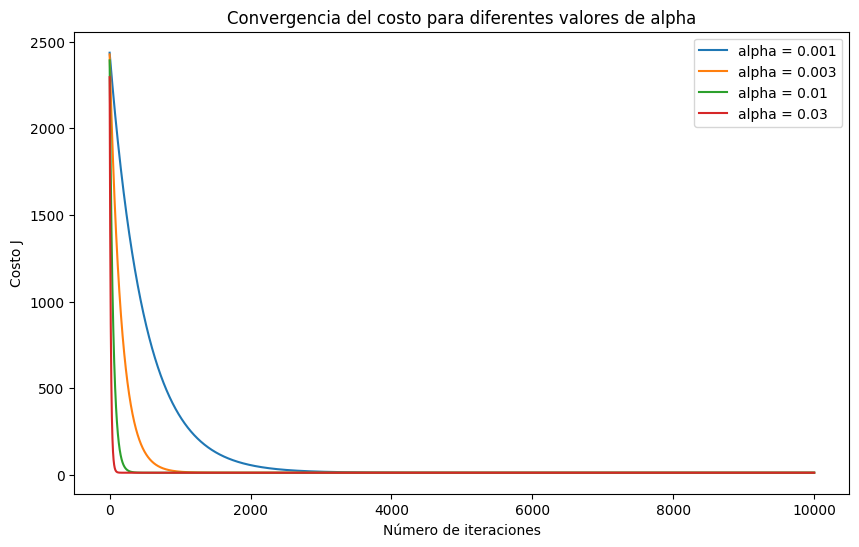

Theta calculado con alpha=0.001: [69.22180457 -4.20307513 -0.57273017  0.43318085  0.70193625  2.82683219
  2.03931326]
Theta calculado con alpha=0.003: [69.22493169 -4.20564644 -0.56971349  0.4279366   0.70290099  2.88831733
  1.977394  ]
Theta calculado con alpha=0.01: [69.22493169 -4.2056552  -0.56965146  0.42783673  0.70292826  2.8894889
  1.97623879]
Theta calculado con alpha=0.03: [69.22493169 -4.2056552  -0.56965146  0.42783673  0.70292826  2.8894889
  1.97623878]


In [ ]:
import matplotlib.pyplot as plt

# Probar diferentes valores de alpha
alphas = [0.001, 0.003, 0.01, 0.03]
num_iters = 10000   # Número de iteraciones para el descenso por el gradiente
theta_results = {}  # Diccionario para guardar los theta finales obtenidos con cada valor de alpha


plt.figure(figsize=(10, 6)) # Crear una figura para graficar la convergencia del costo

for alpha in alphas:
    # Inicializar theta en ceros
    theta = np.zeros(X.shape[1])

    # Ejecutar descenso por el gradiente
    theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

    # Guardar theta final para cada alpha
    theta_results[alpha] = theta

    # Graficar la convergencia del costo
    plt.plot(np.arange(len(J_history)), J_history, label=f"alpha = {alpha}")

plt.xlabel("Número de iteraciones")
plt.ylabel("Costo J")
plt.title("Convergencia del costo para diferentes valores de alpha")
plt.legend()
plt.show()

# Mostrar los resultados del descenso por el gradiente
for alpha, theta in theta_results.items():
    print(f'Theta calculado con alpha={alpha}: {theta}')



In [ ]:
import numpy as np
# Seleccionar la mejor theta entrenada (ejemplo con alpha = 0.01)
theta_optima = theta_results[0.001]

# Definir los valores de entrada para la predicción (mismo orden que en el entrenamiento)
# ["Adult Mortality", "infant deaths", "Total expenditure", "GDP", "Schooling", "Income composition of resources"]
# ["Mortalidad de adultos", "Muertes infantiles", "Gasto total", "PIB", "Educación", "Composición del ingreso de los recursos"]
X_nuevo = np.array([263, 62, 8.16, 584.259210, 10.1, 0.479])  # Datos reales

# Verificar que mu y sigma sean arreglos numpy
mu = np.array(mu)
print(mu)
sigma = np.array(sigma)
print(sigma)
# Normalizar X_nuevo usando la media y desviación estándar del conjunto de entrenamiento
X_nuevo_norm = (X_nuevo - mu) / sigma

# Agregar el término de intersección (columna de unos)
X_nuevo_norm = np.insert(X_nuevo_norm, 0, 1)  # Insertar un 1 en la posición 0

# Verificar dimensiones
print(f"Dimensión de X_nuevo_norm: {X_nuevo_norm.shape}")
print(f"Dimensión de theta: {theta_optima.shape}")

# Asegurar que theta_optima tiene la misma cantidad de elementos que X_nuevo_norm
if X_nuevo_norm.shape[0] != theta_optima.shape[0]:
    raise ValueError("Dimensiones incompatibles entre X_nuevo_norm y theta_optima.")

# Calcular la predicción de esperanza de vida
life_expectancy_pred = np.dot(X_nuevo_norm, theta_optima)

print(f"La esperanza de vida predicha es: {life_expectancy_pred:.2f} años")



[1.64796448e+02 3.03039483e+01 5.93818953e+00 7.48315847e+03
 1.19927928e+01 6.27551065e-01]
[1.24059183e+02 1.17906430e+02 2.39986532e+00 1.31345646e+04
 3.26382569e+00 2.04784881e-01]
Dimensión de X_nuevo_norm: (7,)
Dimensión de theta: (7,)
La esperanza de vida predicha es: 62.65 años


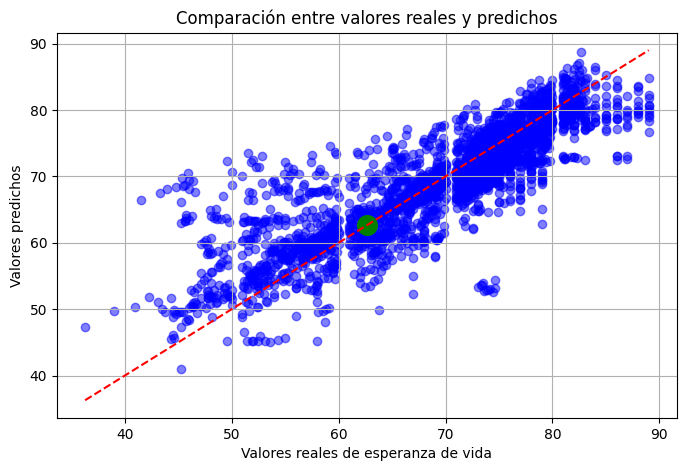

In [ ]:
# Comparación entre valores reales y predichos
y_pred = np.dot(X, theta)  # Calcula las predicciones usando los parámetros ajustados (theta)

plt.figure(figsize=(8,5))    # Crea una nueva figura con un tamaño específico
plt.scatter(y, y_pred, alpha=0.5, color='blue')   # Dibuja puntos azules para comparar valores reales y predichos
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='dashed')  # Línea ideal de predicciones perfectas
# Añadir el punto de la predicción
plt.scatter(life_expectancy_pred, life_expectancy_pred, color='green', s=200, label='Predicción específica')
plt.xlabel("Valores reales de esperanza de vida")
plt.ylabel("Valores predichos")
plt.title("Comparación entre valores reales y predichos")
plt.grid()
plt.show()


# Ecuacion de la Normal

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$


In [ ]:
import numpy as np
print(y)  # Muestra los valores reales de esperanza de vida
print(X)  # Muestra la matriz con los datos de las variables predictoras

def normalEquation(X, y):
  theta = np.zeros(X.shape[1])   # Inicializamos theta en ceros (esto es opcional ya que lo redefinimos a continuación)

    # Se calcula theta usando la fórmula de la ecuación normal:
    # 1. Se computa X^T * X
    # 2. Se invierte la matriz resultante
    # 3. Se multiplica por X^T
    # 4. Finalmente se multiplica por y para obtener theta
  theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
  return theta


  """ Calcula theta usando la ecuación normal """
#    return np.linalg.pinv(X.T @ X) @ X.T @ y  # Usamos pinv para evitar problemas de invertibilidad


# Calcular theta con la ecuación normal
theta_normal = normalEquation(X, y)

print("Theta calculado con la ecuación normal:", theta_normal)

# Hacer predicción con la ecuación normal
X_nuevo = np.array([263, 62, 8.16, 584.259210, 10.1, 0.479])  # Datos de ejemplo
X_nuevo_norm = (X_nuevo - mu) / sigma  # Normalizar los valores
X_nuevo_norm = np.insert(X_nuevo_norm, 0, 1)  # Agregar el término de intersección

# Calcular la predicción: se realiza el producto punto entre el vector de datos normalizados (con el 1 añadido)
# y el vector de parámetros theta calculado con la ecuación normal
life_expectancy_pred_normal = np.dot(X_nuevo_norm, theta_normal)

print(f"La esperanza de vida predicha con la ecuación normal es: {life_expectancy_pred_normal:.2f} años")


0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy, Length: 2938, dtype: float64
[[ 1.          0.79158632  0.26882378 ... -0.52524766 -0.57993072
  -0.72540055]
 [ 1.          0.85607167  0.28578638 ... -0.52308258 -0.61056961
  -0.74005007]
 [ 1.          0.83188966  0.30274898 ... -0.52163233 -0.6412085
  -0.7693491 ]
 ...
 [ 1.         -0.73994077 -0.04498439 ... -0.56536401 -0.61056961
  -0.97932554]
 [ 1.          4.20124926 -0.04498439 ... -0.52796354 -0.6718474
  -0.97932554]
 [ 1.          4.03197521 -0.05346569 ... -0.52805706 -0.6718474
  -0.94514333]]
Theta calculado con la ecuación normal: [69.22493169 -4.2056552  -0.56965146  0.42783673  0.70292826  2.8894889
  1.97623878]
La esperanza de vida predicha con la ecuación normal es: 62.66 años
